In [1]:
import pandas as pd

In [2]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [3]:
import networkx as nx

In [4]:
#Open file as a data Frame
data = pd.read_csv('Social_Network_Ads.csv')

In [5]:
print(data.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [6]:
#Checking for null values
print(data.isnull().sum())
#No null values found

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [7]:
#Checking for duplicated rows
print(data.duplicated().sum())

33


In [14]:
#Getting rid of duplicated rows
data_cleaned = data.dropna()
data_cleaned = data_cleaned.drop_duplicates()

In [15]:
#Checking data types to make sure they are in the right format
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [16]:
print(data_cleaned.info())
print(data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              367 non-null    int64
 1   EstimatedSalary  367 non-null    int64
 2   Purchased        367 non-null    int64
dtypes: int64(3)
memory usage: 11.5 KB
None
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [17]:
# Creating the graph and adding nodes
G = nx.Graph()

for index, row in data_cleaned.iterrows():
    G.add_node(index, age=row['Age'], income=row['EstimatedSalary'], purchased=row['Purchased'])

# Add edges based on  similarity in age, income
for i in range(len(data_cleaned)):
    for j in range(i + 1, len(data_cleaned)):
        if abs(data_cleaned.iloc[i]['Age'] - data_cleaned.iloc[j]['Age']) < 5 and abs(data_cleaned.iloc[i]['EstimatedSalary'] - data_cleaned.iloc[j]['EstimatedSalary']) < 10000:
            G.add_edge(i, j)
            
            
            
            
            

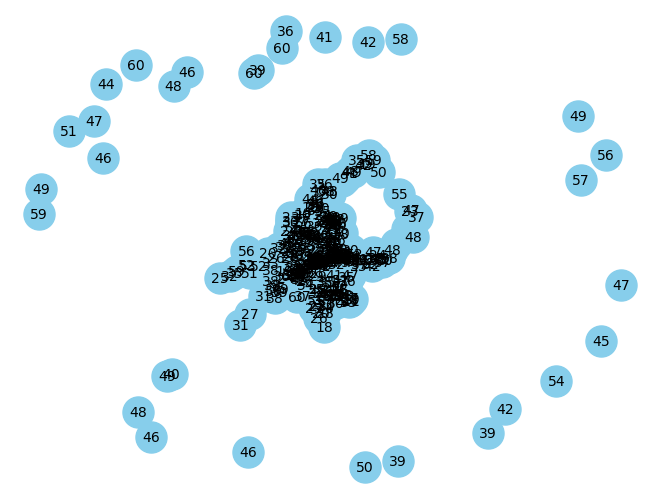

In [18]:
import matplotlib.pyplot as plt



# Draw the graph with Age as the label
node_labels = nx.get_node_attributes(G, 'age')
nx.draw(G, labels=node_labels, with_labels=True, node_color="skyblue", node_size=500, font_size=10)


In [19]:
# Directed graph 
G = nx.DiGraph()


In [20]:
# Add edges and assign age as a node attribute
G.add_edge("Page A", "Page B")
G.add_edge("Page A", "Page C")
G.add_edge("Page B", "Page C")
G.add_edge("Page C", "Page D")


age_data = {"Page A": 25, "Page B": 30, "Page C": 35, "Page D": 40}

# Add the ages as node attributes
nx.set_node_attributes(G, age_data, 'Age')
node_ages = nx.get_node_attributes(G, 'Age')


In [21]:


#degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)


# Get the ages from the graph
node_ages = nx.get_node_attributes(G, 'Age')

# Create a dictionary to store degree centrality by age
age_centrality = {}

# Grouping
for node, centrality in degree_centrality.items():
    age = node_ages[node]  # Get the age of the node
    if age not in age_centrality:
        age_centrality[age] = []
    age_centrality[age].append(centrality)

# Average degree centrality for each age group
avg_age_centrality = {age: sum(c) / len(c) for age, c in age_centrality.items()}

# Sort 
sorted_age_centrality = dict(sorted(avg_age_centrality.items()))

for age, avg_centrality in sorted_age_centrality.items():
    print(f"Age {age}: {avg_centrality:.3f}")


Age 25: 0.667
Age 30: 0.667
Age 35: 1.000
Age 40: 0.333


In [22]:

# All centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)

# By age
def group_by_age(centrality_values):
    age_centrality = {}
    for node, centrality in centrality_values.items():
        age = node_ages[node]  # Get the age of the node
        if age not in age_centrality:
            age_centrality[age] = []
        age_centrality[age].append(centrality)

    # average centrality for each age group
    avg_age_centrality = {age: sum(c) / len(c) for age, c in age_centrality.items()}
    return dict(sorted(avg_age_centrality.items()))


avg_degree_centrality = group_by_age(degree_centrality)
avg_betweenness_centrality = group_by_age(betweenness_centrality)
avg_closeness_centrality = group_by_age(closeness_centrality)
avg_pagerank = group_by_age(pagerank)





In [23]:
print("Average Degree Centrality by Age:", avg_degree_centrality)

Average Degree Centrality by Age: {25: 0.6666666666666666, 30: 0.6666666666666666, 35: 1.0, 40: 0.3333333333333333}


In [24]:
print("Average Betweenness Centrality by Age:", avg_betweenness_centrality)



Average Betweenness Centrality by Age: {25: 0.0, 30: 0.0, 35: 0.3333333333333333, 40: 0.0}


In [25]:
print("Average Closeness Centrality by Age:", avg_closeness_centrality)


Average Closeness Centrality by Age: {25: 0.0, 30: 0.3333333333333333, 35: 0.6666666666666666, 40: 0.6}


In [26]:
print("Average PageRank by Age:", avg_pagerank)

Average PageRank by Age: {25: 0.12045209234069676, 30: 0.1716439352034471, 35: 0.3175410567582492, 40: 0.39036291569760717}


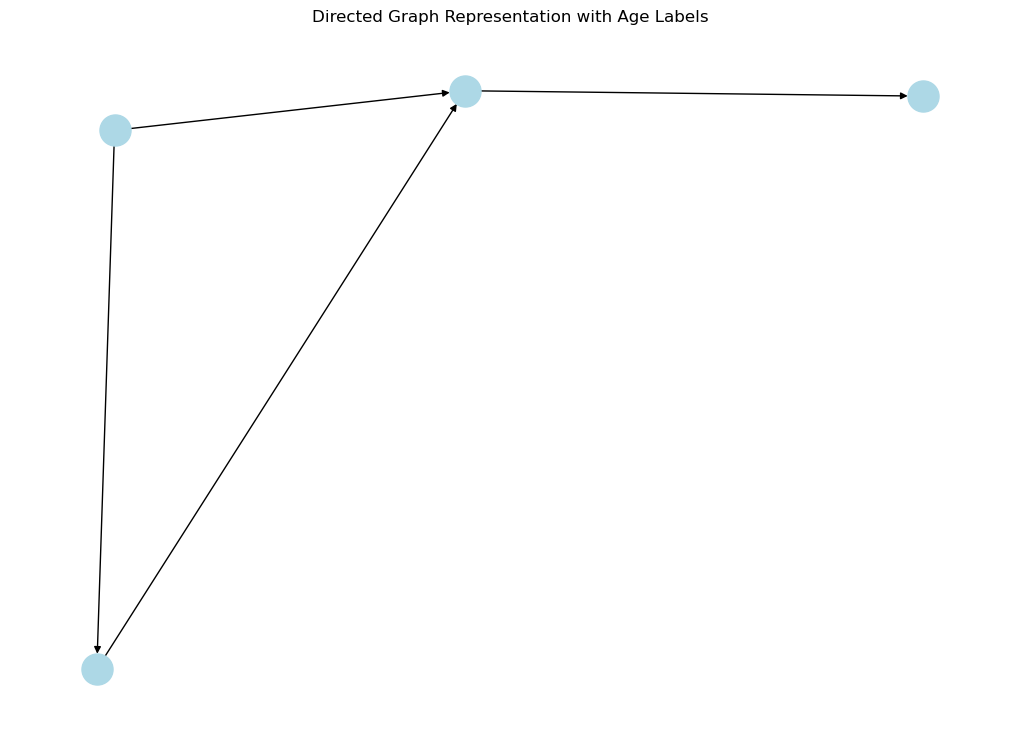

In [27]:
# Draw the directed graph with age as nodes
plt.figure(figsize=(10, 7))  
pos = nx.spring_layout(G)  

# label nodes by age
node_labels = nx.get_node_attributes(G, 'age')

# graph with labels (age)and arrows for direction
nx.draw(G, pos, labels=node_labels, with_labels=True, 
        node_color='lightblue', node_size=500, font_size=8, arrows=True)
plt.title("Directed Graph Representation with Age Labels")
plt.show()


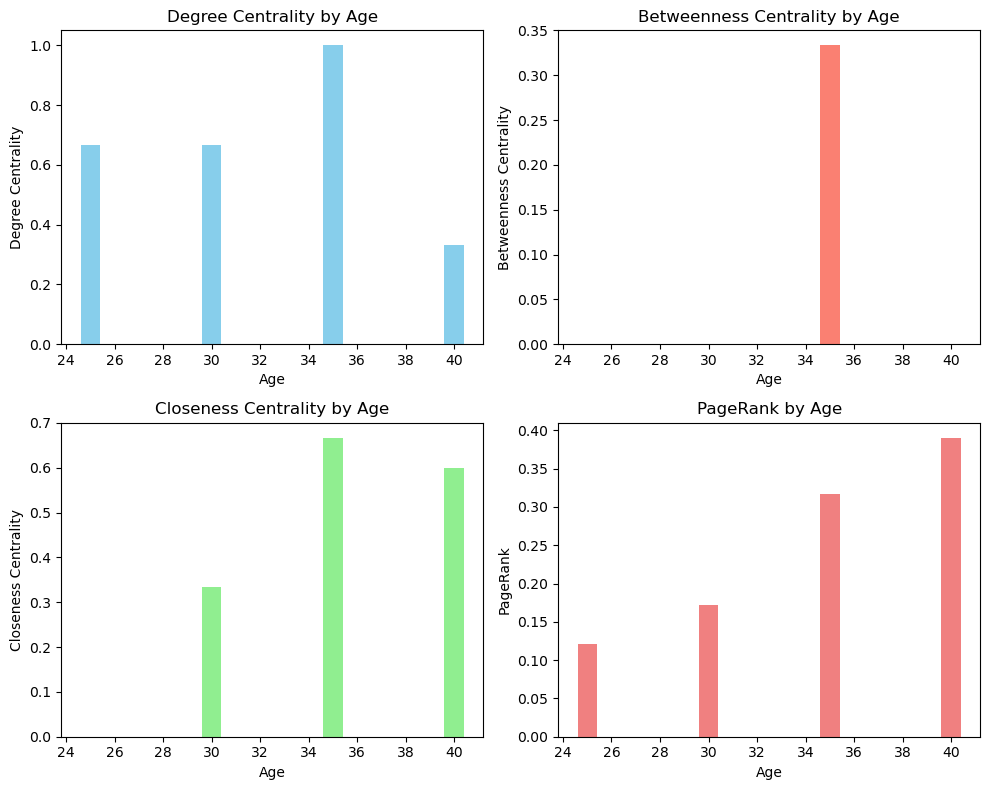

In [28]:
#Displaying with bar graphs
import matplotlib.pyplot as plt
avg_degree_centrality = {25: 0.6666666666666666, 30: 0.6666666666666666, 35: 1.0, 40: 0.3333333333333333}
avg_betweenness_centrality = {25: 0.0, 30: 0.0, 35: 0.3333333333333333, 40: 0.0}
avg_closeness_centrality = {25: 0.0, 30: 0.3333333333333333, 35: 0.6666666666666666, 40: 0.6}
avg_pagerank = {25: 0.12045209234069676, 30: 0.1716439352034471, 35: 0.3175410567582492, 40: 0.39036291569760717}

# change dicts to lists
ages = list(avg_degree_centrality.keys())  
degree_centrality_values = list(avg_degree_centrality.values())
betweenness_centrality_values = list(avg_betweenness_centrality.values())
closeness_centrality_values = list(avg_closeness_centrality.values())
pagerank_values = list(avg_pagerank.values())

# subplots 
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Degree Centrality 
axs[0, 0].bar(ages, degree_centrality_values, color='skyblue')
axs[0, 0].set_title('Degree Centrality by Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Degree Centrality')

# Betweenness Centrality 
axs[0, 1].bar(ages, betweenness_centrality_values, color='salmon')
axs[0, 1].set_title('Betweenness Centrality by Age')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Betweenness Centrality')

# Closeness Centrality 
axs[1, 0].bar(ages, closeness_centrality_values, color='lightgreen')
axs[1, 0].set_title('Closeness Centrality by Age')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Closeness Centrality')

# PageRank 
axs[1, 1].bar(ages, pagerank_values, color='lightcoral')
axs[1, 1].set_title('PageRank by Age')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('PageRank')

plt.tight_layout()
plt.show()
